In [ ]:
import cv2
import matplotlib.pyplot as plt
import re
import numpy as np
import glob
import pandas as pd
import os


In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="p097JrHP63OYlTZ1mmwQ")
project = rf.workspace("chi-b5fvz").project("cccd-goc")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cccd-goc-3 in yolov8:: 100%|██████████| 499/499 [00:00<00:00, 5994.40it/s]


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 128.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
import cv2

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
yaml_content = """
path: cccd-goc-3
train: train/images
val: valid/images
nc: 4
names: ['bottom-left', 'bottom-right','top-left', 'top-right']
"""

with open("figures.yaml", "w") as f:
    f.write(yaml_content.strip())

In [ ]:
model = YOLO("yolov8s.pt")
model.train(data="figures.yaml",optimizer='AdamW',epochs=80,lr0=0.000005)

100%|██████████| 21.5M/21.5M [00:00<00:00, 193MB/s]


Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=figures.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=5e-06, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2117596  ultralytics.nn.modules.head.Detect           [4, [128, 256, 512]]          
Model summary: 129 layers, 11,137,148 parameters, 11,137,132 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 90.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 21.7±1.8 MB/s, size: 49.0 KB)


train: Scanning /content/cccd-goc-3/train/labels... 185 images, 0 backgrounds, 0 corrupt: 100%|██████████| 185/185 [00:00<00:00, 692.33it/s]

train: New cache created: /content/cccd-goc-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.0±5.9 MB/s, size: 48.9 KB)


val: Scanning /content/cccd-goc-3/valid/labels... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 485.67it/s]

val: New cache created: /content/cccd-goc-3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: AdamW(lr=5e-06, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 80 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/80       3.7G       3.84      9.469      2.316         38        640: 100%|██████████| 12/12 [00:05<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

                   all         60        234   8.29e-05    0.00417   4.22e-05   2.95e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/80       4.5G       2.88      4.364      1.732         44        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         60        234          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/80      4.53G      2.594       2.93      1.598         55        640: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         60        234    0.00124    0.00417   0.000629   0.000126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/80      4.57G      2.398      2.286      1.541         44        640: 100%|██████████| 12/12 [00:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         60        234     0.0045      0.159     0.0241    0.00902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/80      4.61G      2.318      2.022      1.481         51        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         60        234      0.883        0.1      0.177     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/80      4.65G       2.33       1.94      1.481         51        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         60        234      0.356       0.31      0.319      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/80      4.68G      2.196      1.727      1.408         42        640: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         60        234      0.423      0.494      0.437      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/80      4.72G      2.237      1.712      1.424         46        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         60        234      0.516      0.541      0.501      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/80      4.76G      2.206      1.677      1.401         45        640: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         60        234      0.561      0.562      0.553      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/80      4.79G      2.177      1.633      1.385         42        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         60        234       0.57      0.553      0.546      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/80      4.83G      2.216      1.668      1.432         41        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]

                   all         60        234      0.612      0.549      0.559      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/80      4.87G      2.168       1.62      1.416         44        640: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]

                   all         60        234      0.647      0.544      0.578      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/80       4.9G      2.143      1.589      1.368         39        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         60        234      0.612      0.611      0.605      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/80      4.94G      2.161      1.576      1.384         58        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         60        234      0.642      0.606      0.612      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/80      4.97G       2.14      1.602      1.385         39        640: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         60        234      0.638      0.627      0.616      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/80      5.01G      2.124      1.563      1.344         40        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         60        234      0.654      0.622      0.622      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/80      5.05G      2.153      1.593      1.392         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         60        234      0.661      0.628      0.625      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/80      5.08G      2.167      1.557      1.371         58        640: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         60        234      0.678       0.63      0.637      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/80      5.12G      2.143      1.557       1.37         40        640: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         60        234      0.673       0.63      0.641      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/80      5.16G      2.102      1.514      1.373         38        640: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.08it/s]

                   all         60        234      0.656      0.638      0.642      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/80      5.19G      2.141      1.527      1.396         52        640: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         60        234      0.664      0.643      0.643      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/80      5.23G      2.119      1.531      1.404         59        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         60        234      0.656      0.692       0.65      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/80      5.26G      2.085      1.488      1.332         47        640: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.25it/s]

                   all         60        234      0.655      0.695      0.653      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/80       5.3G      2.144      1.469      1.372         45        640: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         60        234      0.666      0.685      0.645      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/80      5.34G      2.125      1.474      1.336         47        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         60        234      0.667      0.689      0.656      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/80      5.37G      2.074      1.497      1.333         49        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         60        234      0.671        0.7      0.659       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/80      5.41G       2.06      1.489      1.366         34        640: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         60        234      0.678      0.708      0.664      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/80      5.45G      2.062      1.442      1.321         44        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         60        234       0.68      0.709      0.675      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/80      5.48G      2.069       1.46      1.339         33        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         60        234      0.676      0.718      0.675      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/80      5.52G      2.127       1.49       1.35         30        640: 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         60        234      0.678      0.708      0.674      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/80      5.55G      2.038      1.428      1.346         32        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         60        234      0.679      0.698       0.67      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/80      5.59G      2.043      1.449      1.333         57        640: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         60        234      0.695      0.705      0.679      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/80      5.63G       2.05      1.447      1.335         52        640: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         60        234      0.682      0.718      0.681      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/80      5.66G      2.037       1.43      1.333         43        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         60        234      0.718      0.713      0.687       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/80       5.7G      2.045      1.418      1.311         54        640: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         60        234      0.724      0.711       0.69      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/80      5.74G      2.061        1.4      1.328         39        640: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         60        234      0.711       0.73      0.694      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/80      5.77G      2.066      1.435      1.337         33        640: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         60        234      0.724      0.715      0.692      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/80      5.81G      2.038      1.429      1.337         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        234      0.713      0.714      0.689      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/80      5.85G      2.032      1.374      1.273         41        640: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         60        234      0.694      0.724      0.686      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/80      5.88G      2.071      1.407      1.316         58        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         60        234      0.707       0.72      0.691      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/80      5.92G      2.047      1.422      1.353         48        640: 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]

                   all         60        234      0.701      0.719      0.692       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/80      5.99G      2.012      1.411      1.325         50        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         60        234      0.684      0.726      0.693      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/80      6.06G      2.003      1.391      1.322         49        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         60        234      0.672      0.726      0.692      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/80      6.12G       1.99      1.411       1.29         40        640: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         60        234      0.668      0.731      0.697      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/80       6.2G      2.041      1.385      1.311         45        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         60        234      0.667       0.73      0.684      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/80      6.27G      2.043      1.384      1.293         47        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         60        234      0.673      0.729      0.686      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/80      6.33G      2.036      1.368      1.347         43        640: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         60        234      0.684      0.732      0.686      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/80       6.4G      2.042      1.376      1.311         32        640: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         60        234      0.707      0.713      0.678      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/80      6.44G      2.014      1.376      1.328         43        640: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.48it/s]

                   all         60        234      0.693      0.713      0.683      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/80      6.51G      1.991      1.374      1.317         38        640: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.49it/s]

                   all         60        234      0.727      0.723      0.707      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/80      6.58G      2.004      1.331      1.312         39        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         60        234      0.722      0.727      0.706      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/80      6.65G      2.001      1.348      1.307         59        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         60        234      0.708       0.72      0.688      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/80      6.72G      2.045      1.375      1.298         65        640: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         60        234       0.72      0.711      0.691      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/80      6.75G      2.013      1.345      1.284         41        640: 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         60        234       0.73      0.711      0.687      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/80      6.82G      1.969      1.345      1.282         53        640: 100%|██████████| 12/12 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.13it/s]

                   all         60        234      0.722      0.711      0.688       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/80      6.89G      2.015      1.351      1.312         36        640: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         60        234      0.724      0.732        0.7      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/80      6.96G      2.001      1.323      1.283         55        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         60        234      0.733      0.731      0.698      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/80      7.03G      1.982      1.337      1.281         34        640: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         60        234      0.727      0.726      0.693      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/80       7.1G      1.998       1.37      1.305         34        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                   all         60        234      0.731      0.708      0.689      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/80      7.17G      2.004      1.328      1.307         46        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         60        234      0.722      0.707       0.68       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/80      7.21G      1.966      1.321      1.271         36        640: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.61it/s]

                   all         60        234      0.715      0.702      0.674      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/80      7.28G       2.01      1.335      1.285         60        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         60        234      0.715      0.703      0.677      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/80      7.35G      1.993      1.311       1.27         55        640: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         60        234      0.717      0.708      0.681      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/80      7.42G      1.994      1.302      1.261         47        640: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         60        234      0.713      0.703      0.672       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/80      4.01G      1.982      1.371      1.299         49        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         60        234      0.717        0.7      0.672      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/80      4.01G      2.002      1.326      1.302         54        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         60        234      0.725      0.704       0.68      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/80      4.01G      1.977      1.343      1.296         36        640: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         60        234      0.727      0.709      0.686      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/80      4.01G      1.952      1.347       1.29         39        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.44it/s]

                   all         60        234      0.724      0.715       0.69      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/80      4.01G      1.963      1.333      1.269         48        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         60        234      0.714      0.713       0.68      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/80      4.01G      2.035      1.366      1.312         40        640: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         60        234      0.718      0.722      0.699      0.246


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/80      4.01G      1.903        1.3      1.292         27        640: 100%|██████████| 12/12 [00:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         60        234      0.735      0.702      0.691      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/80      4.01G      2.023      1.353      1.327         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.06it/s]

                   all         60        234      0.737      0.689      0.687      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/80      4.01G      1.989      1.345      1.325         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         60        234      0.728      0.681      0.681      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/80      4.04G       1.99      1.339      1.328         32        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         60        234      0.748      0.694      0.708      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/80      4.06G      1.982       1.32      1.332         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         60        234      0.752      0.692      0.705      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      76/80      4.13G      1.946      1.333      1.286         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         60        234      0.753      0.696      0.703      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      77/80       4.2G      1.957       1.34      1.308         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         60        234      0.747      0.696      0.703      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      78/80      4.27G      1.996      1.352      1.349         30        640: 100%|██████████| 12/12 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.19it/s]

                   all         60        234      0.763      0.699      0.705      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      79/80      4.34G      1.931      1.291      1.284         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         60        234      0.753      0.691       0.69      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      80/80      4.41G      1.938      1.286      1.317         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         60        234      0.759      0.703      0.706      0.253



80 epochs completed in 0.101 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]


                   all         60        234      0.748      0.693      0.704      0.258
           bottom-left         54         54        0.7      0.693      0.664      0.203
          bottom-right         60         60      0.832        0.7      0.754      0.313
              top-left         60         60      0.649      0.647      0.542      0.165
             top-right         60         60      0.812      0.733      0.856       0.35
Speed: 0.3ms preprocess, 5.4ms inference, 0.0ms loss, 4.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a9b65d7c610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
!yolo detect predict model=runs/detect/train/weights/best.pt source= cccd-goc-3/valid/images save=True

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/60 /content/cccd-goc-3/valid/images/img1364_jpg.rf.af01a40990d48d1bbe53e60ca6d5b1d0.jpg: 640x640 2 bottom-lefts, 1 bottom-right, 1 top-left, 1 top-right, 16.3ms
image 2/60 /content/cccd-goc-3/valid/images/img1375_jpg.rf.e44426390080230ae9a0c2e792a780bb.jpg: 640x640 (no detections), 16.3ms
image 3/60 /content/cccd-goc-3/valid/images/img1383_jpg.rf.117808e7d34831b891459553563fbc4d.jpg: 640x640 2 bottom-lefts, 1 bottom-right, 1 top-left, 1 top-right, 16.2ms
image 4/60 /content/cccd-goc-3/valid/images/img1384_jpg.rf.131536c83920f9fa626929c06398b15c.jpg: 640x640 1 bottom-left, 1 bottom-right, 1 top-left, 1 top-right, 16.2ms
image 5/60 /content/cccd-goc-3/valid/images/img1387_jpg.rf.d6d892485c924a54391cf6520ae5fac8.jpg: 640x640 2 bottom-lefts, 2 bottom-rights, 1 top-left, 2 top-rights, 16.2ms
image 6/60 /content/cccd-goc

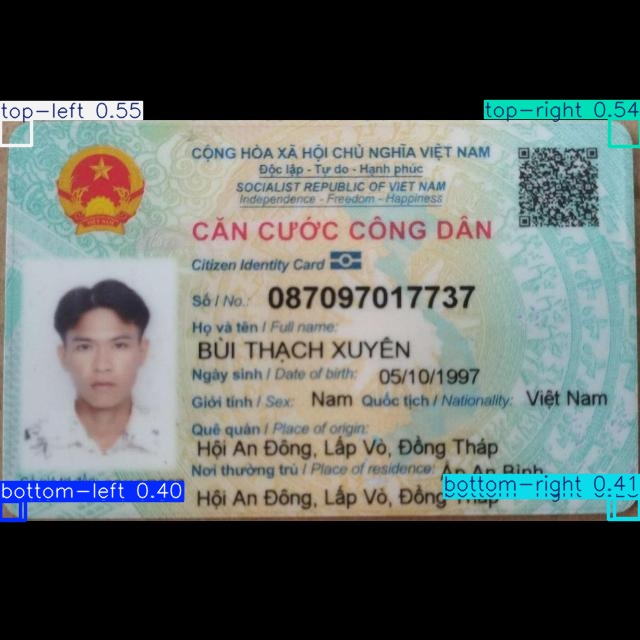

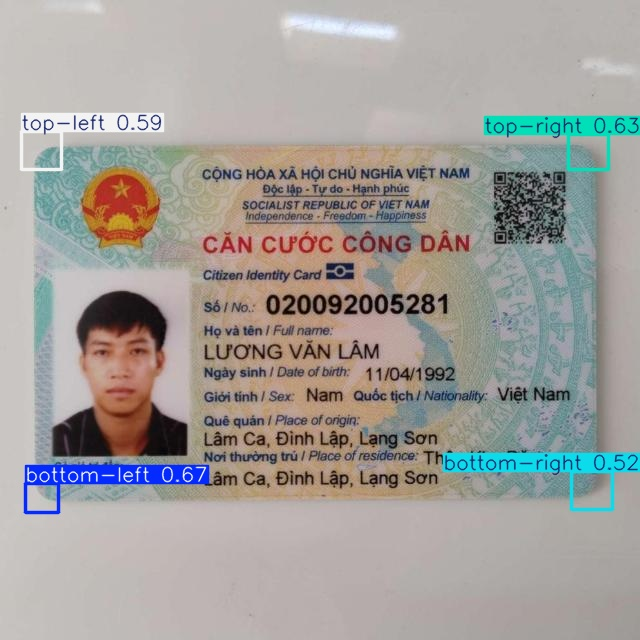

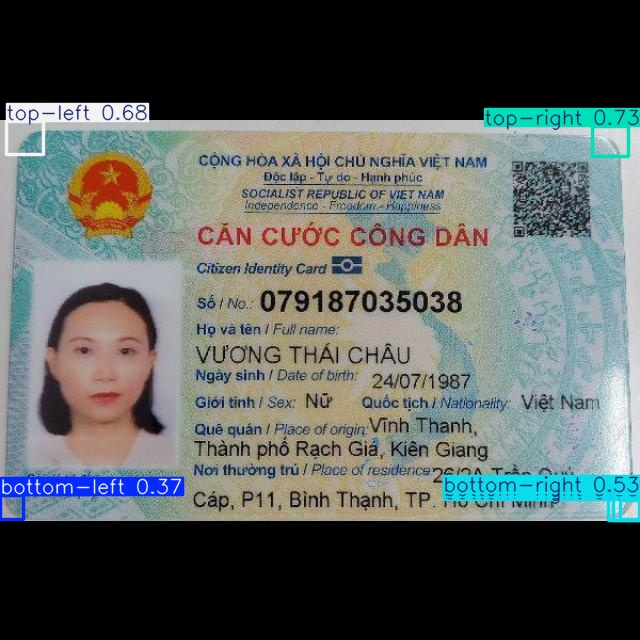

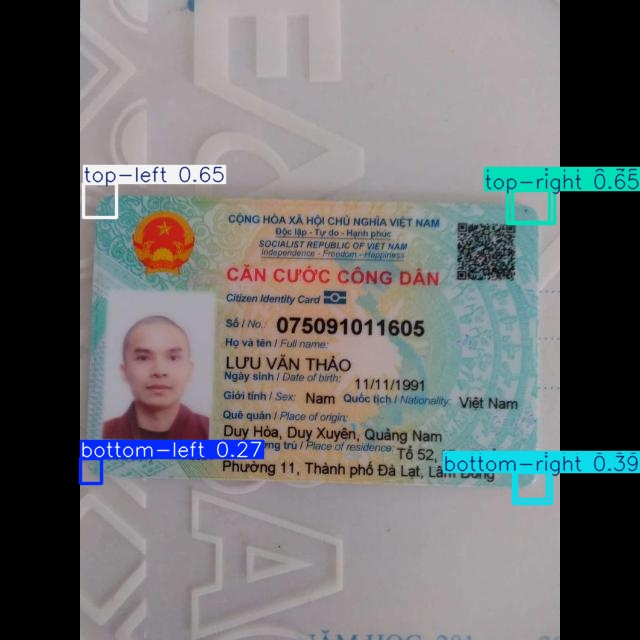

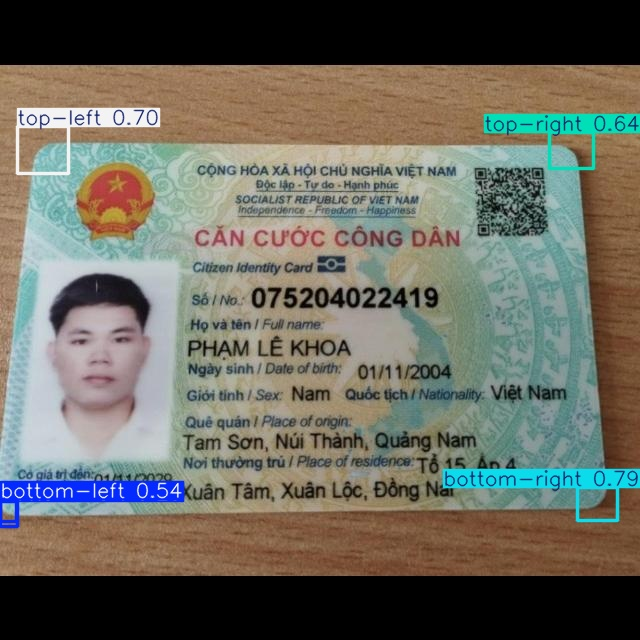

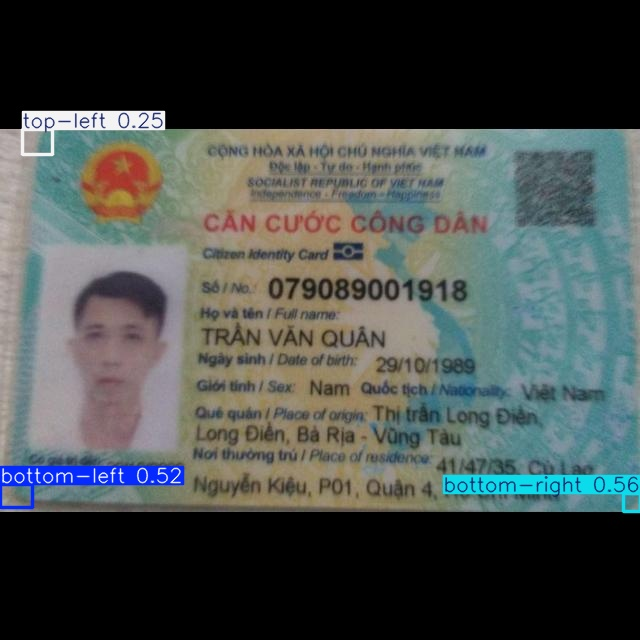

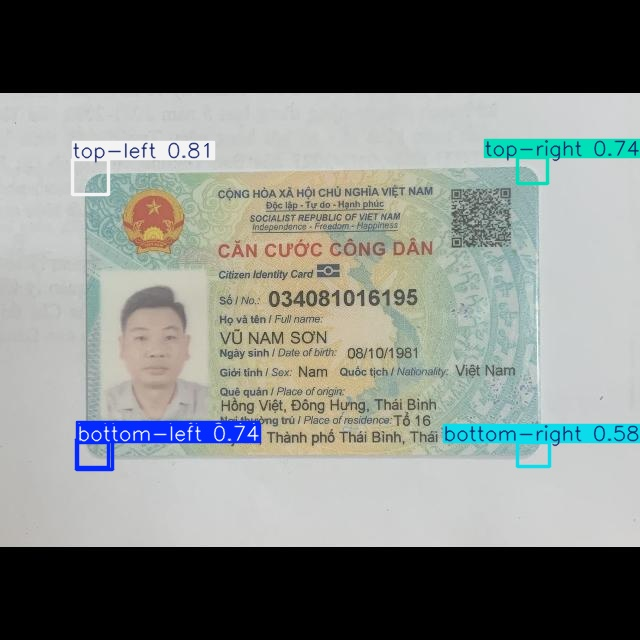

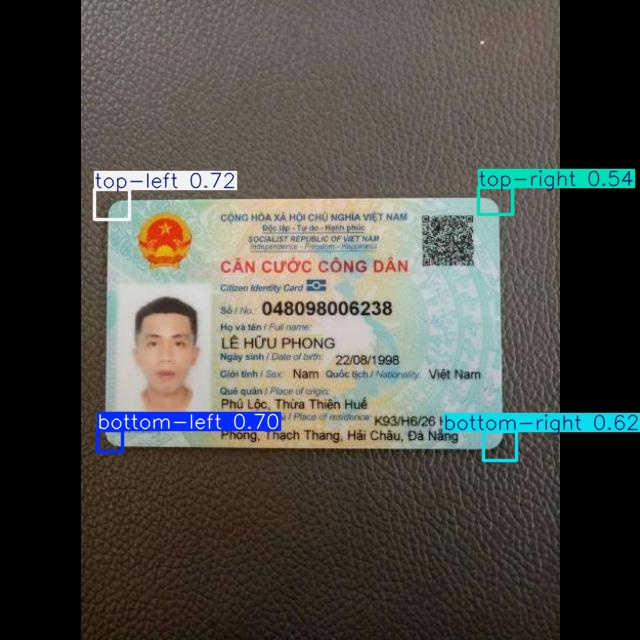

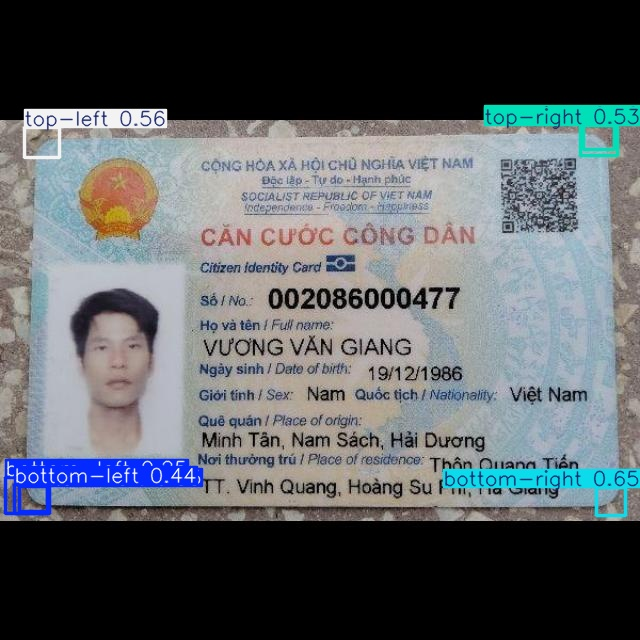

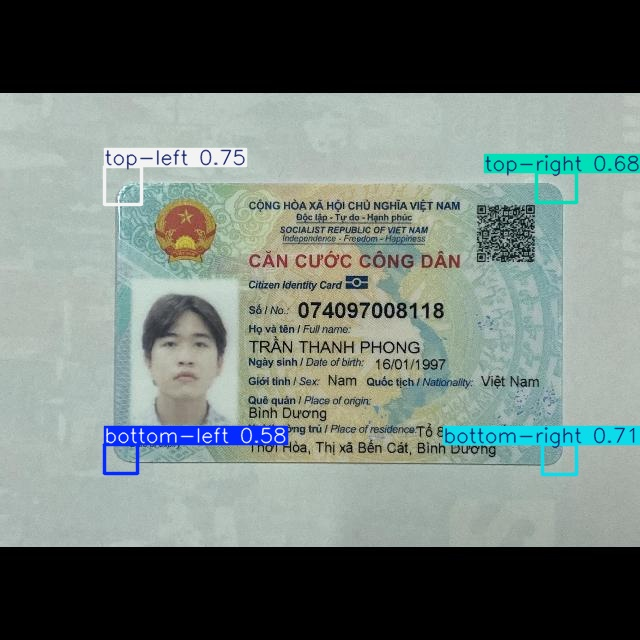

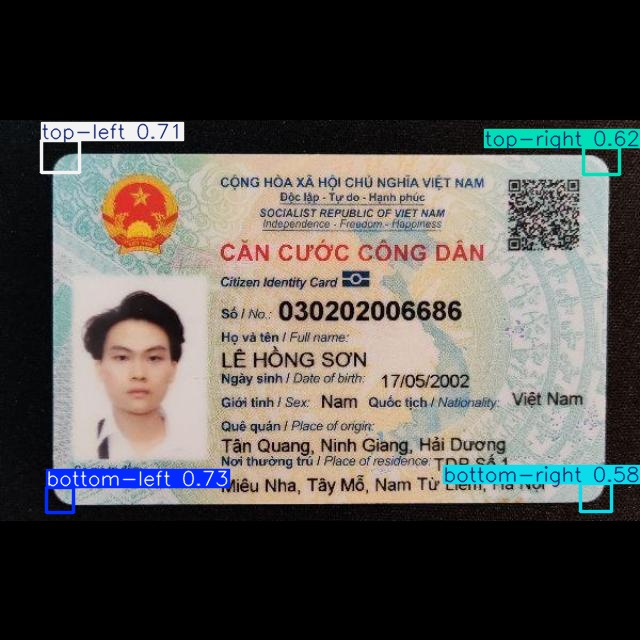

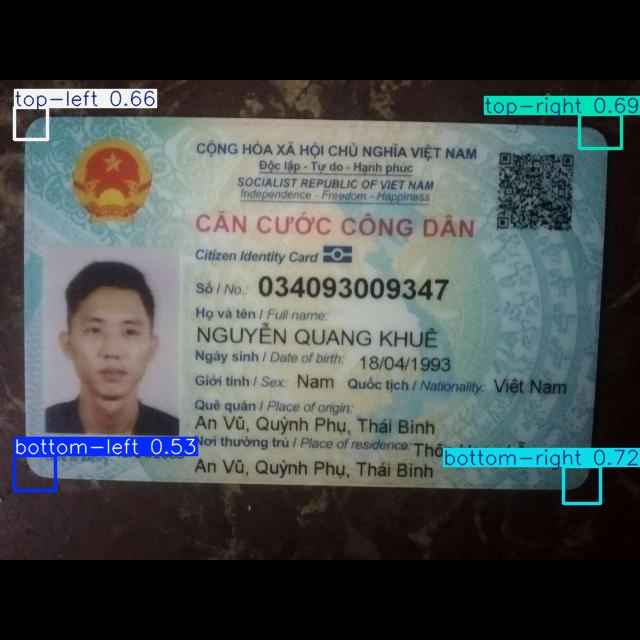

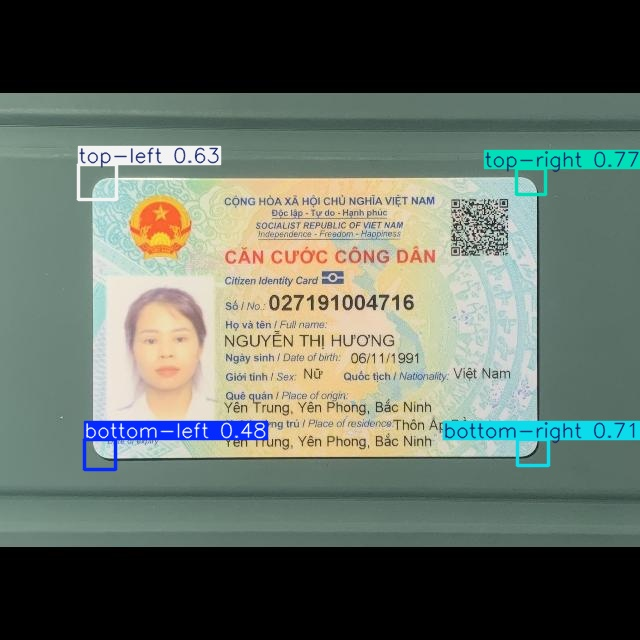

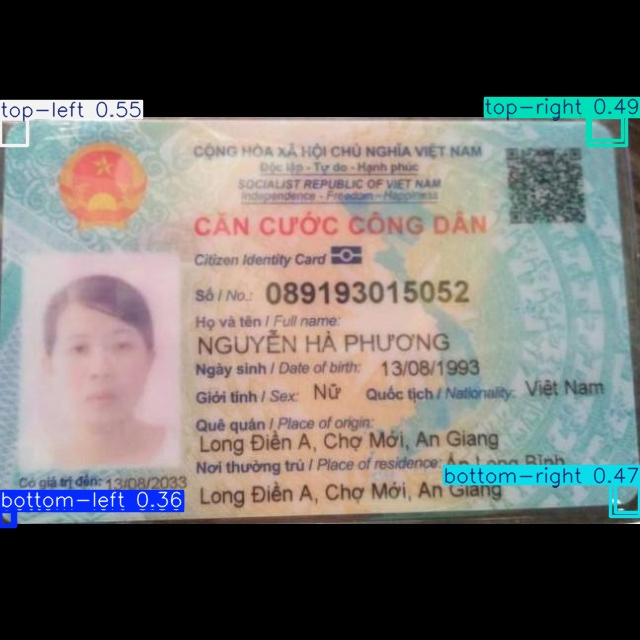

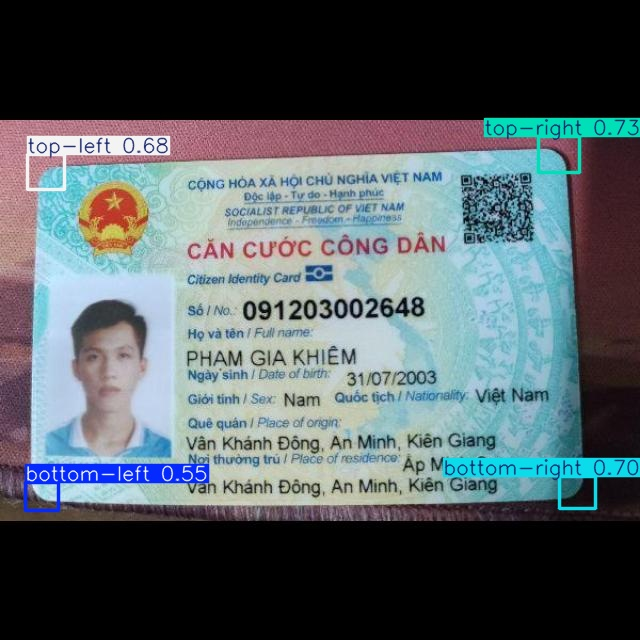

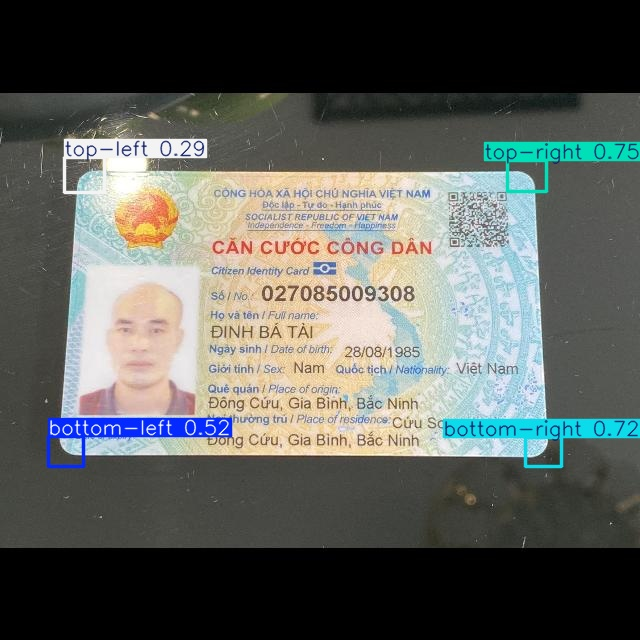

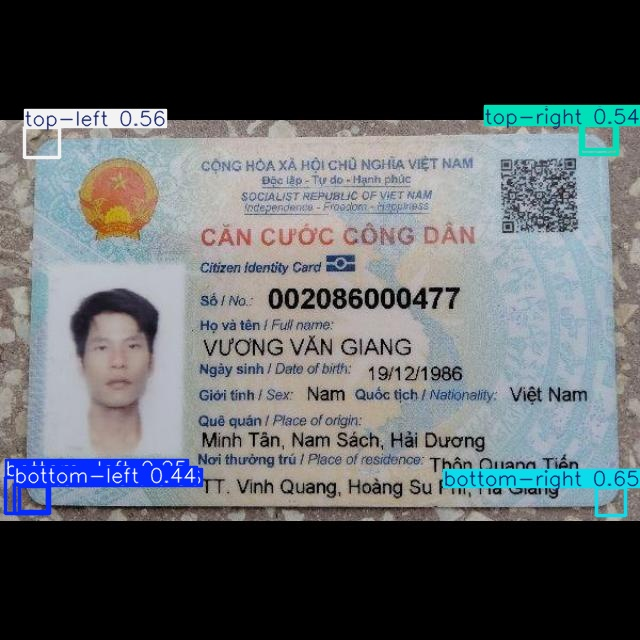

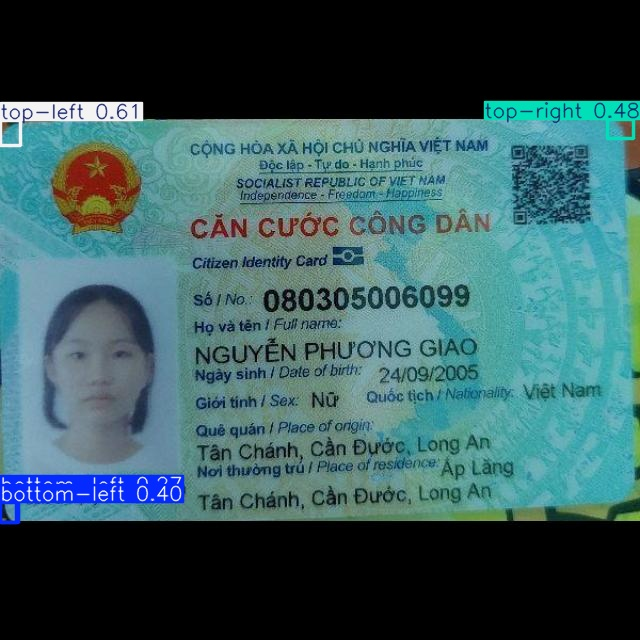

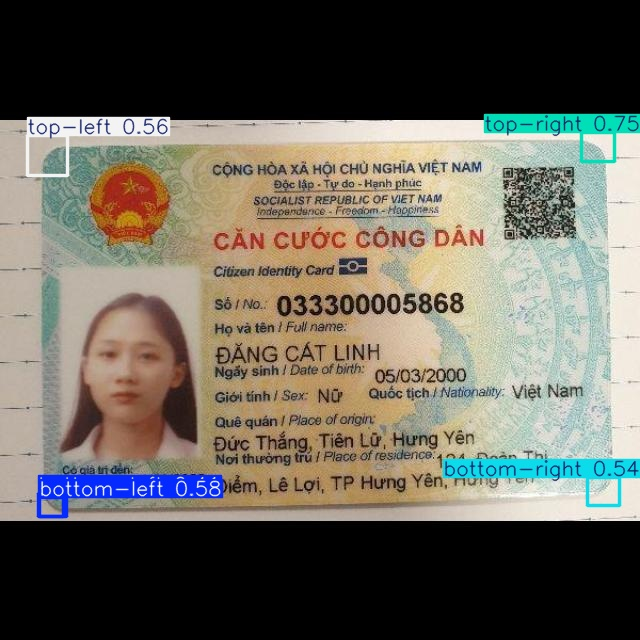

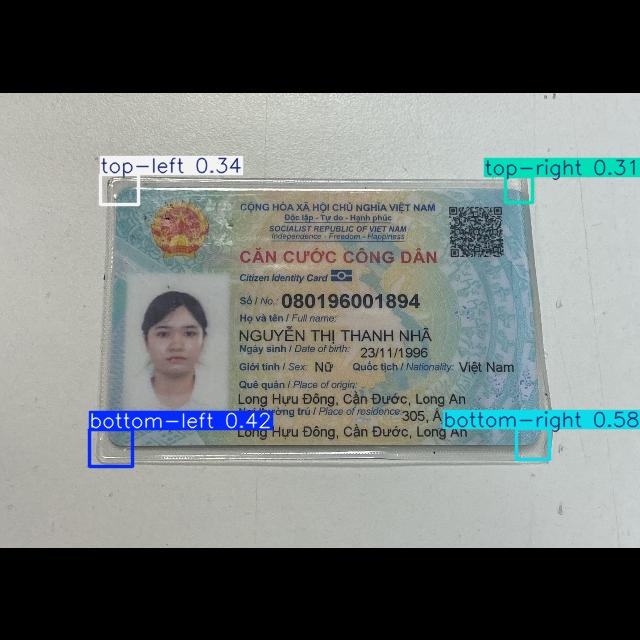

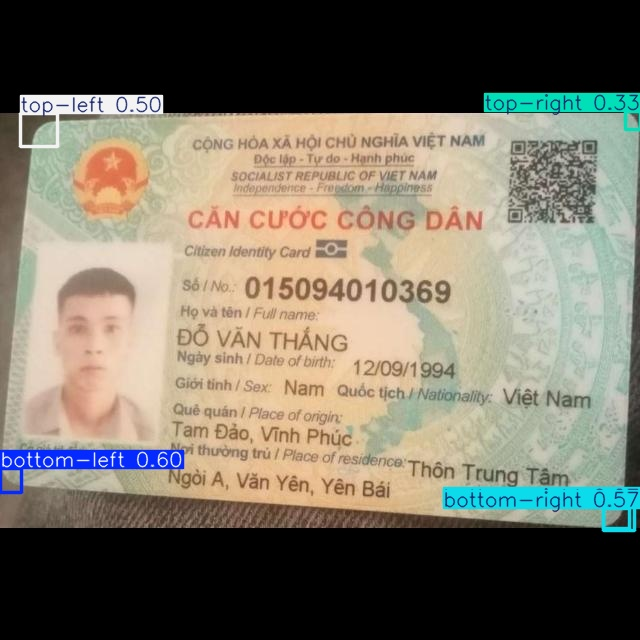

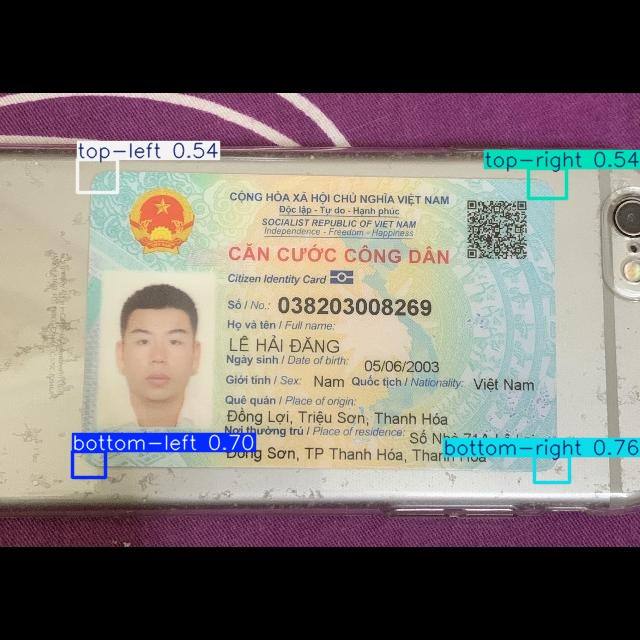

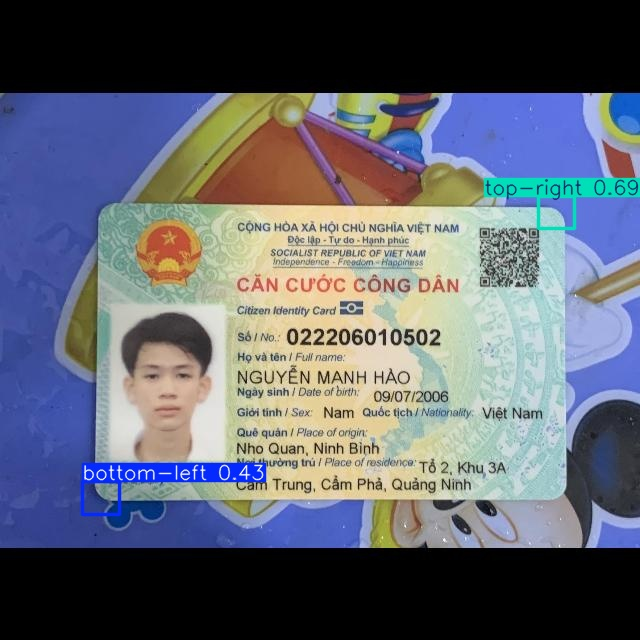

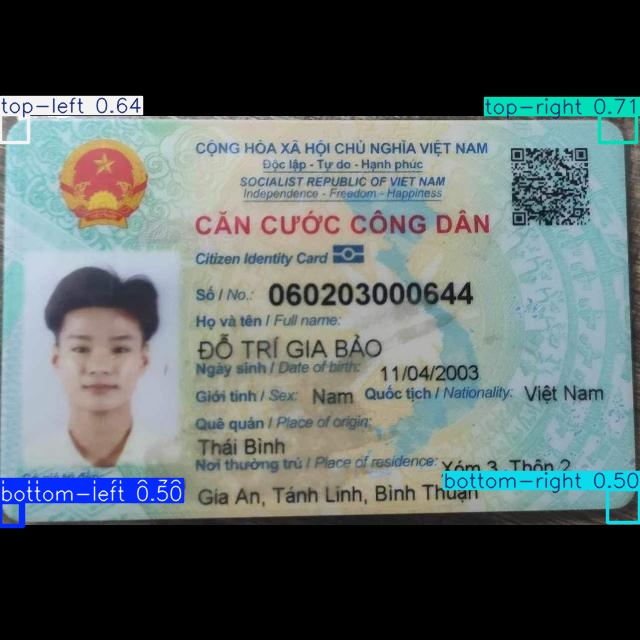

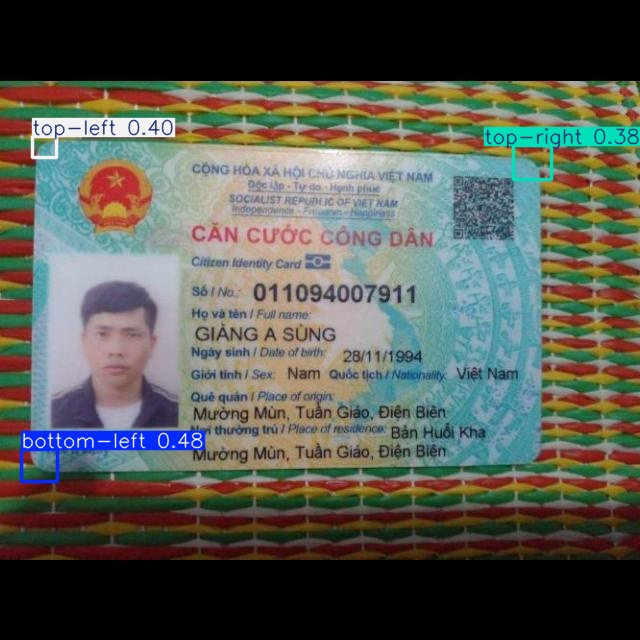

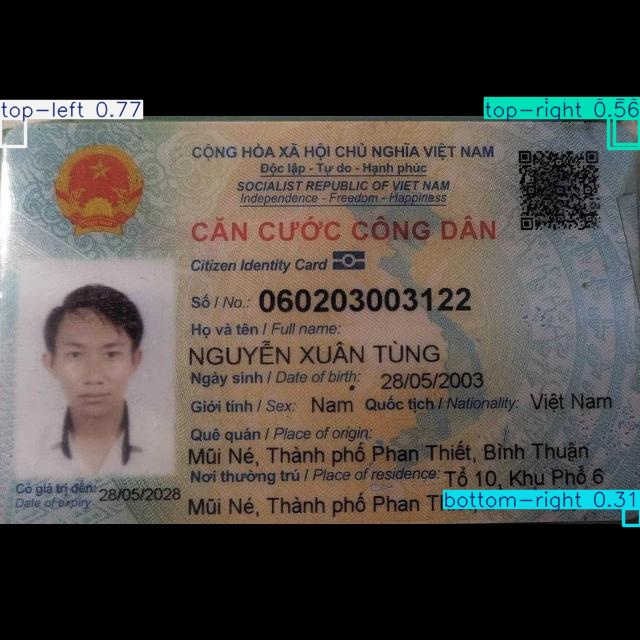

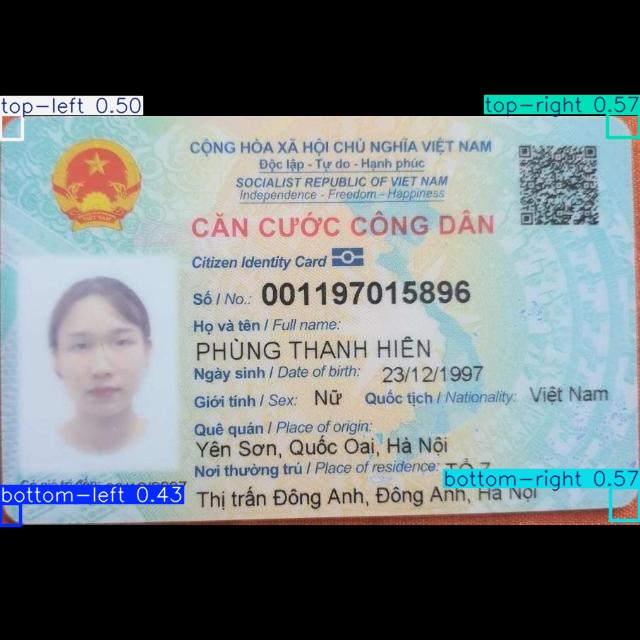

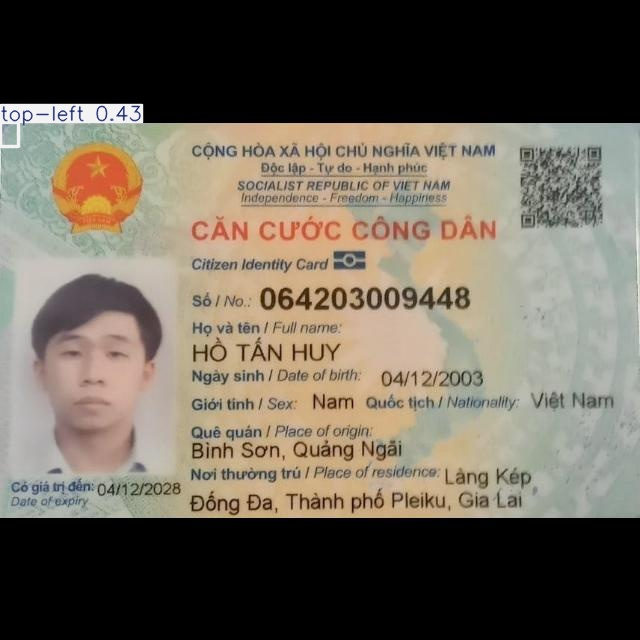

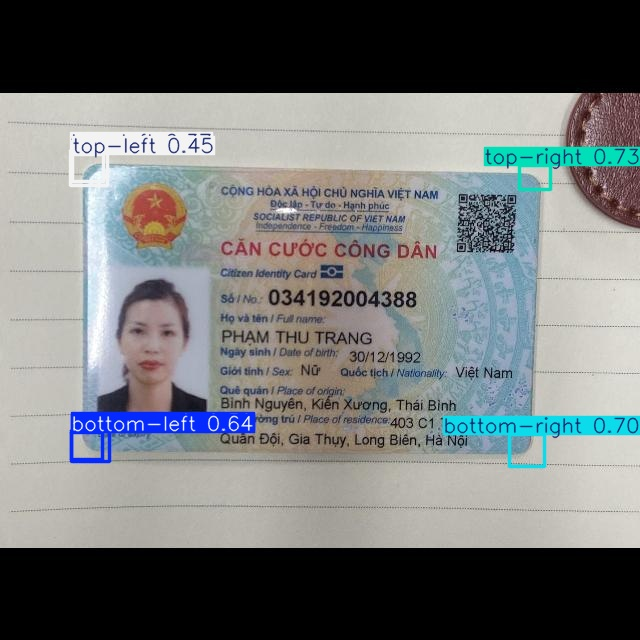

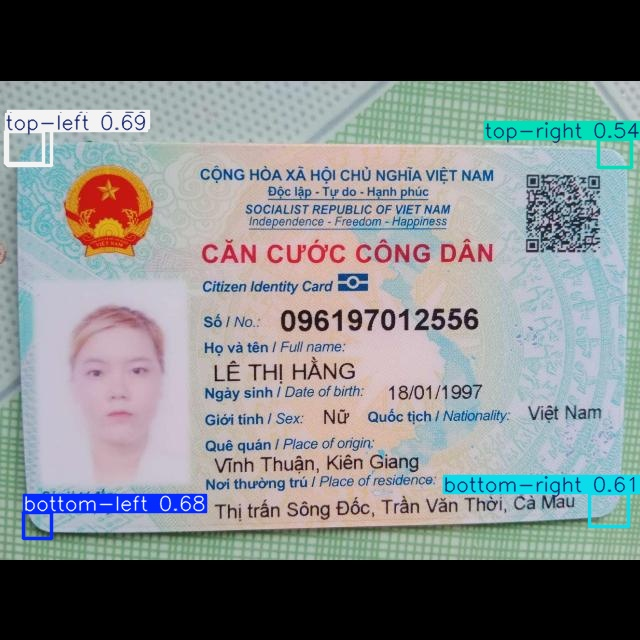

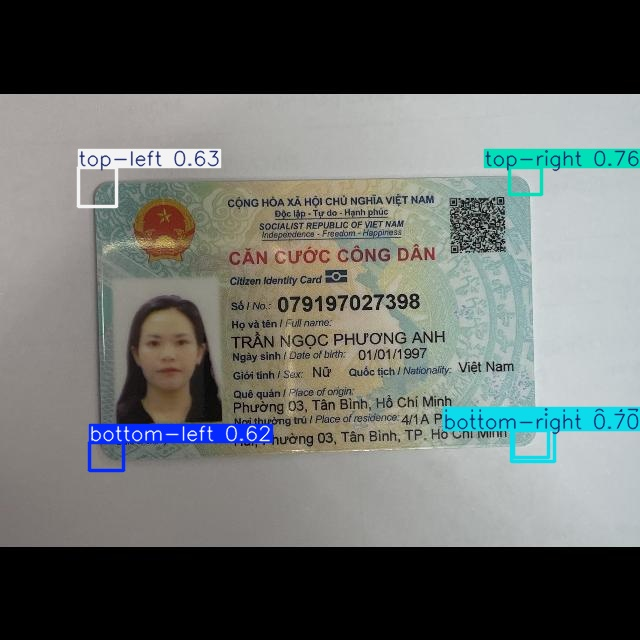

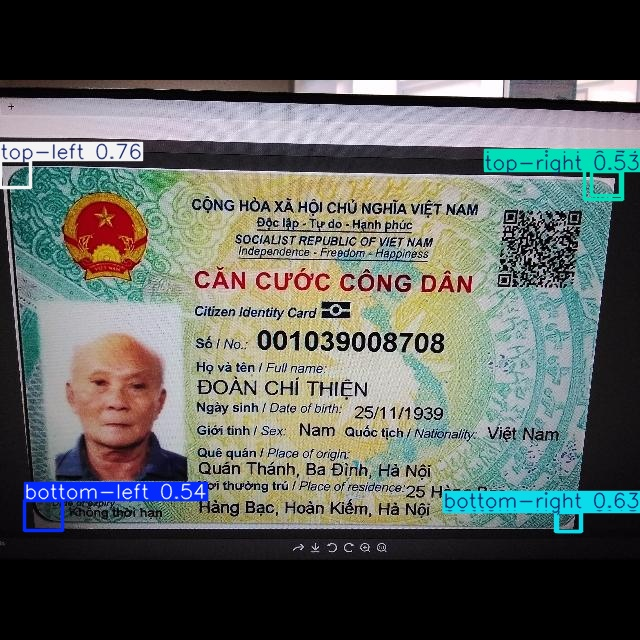

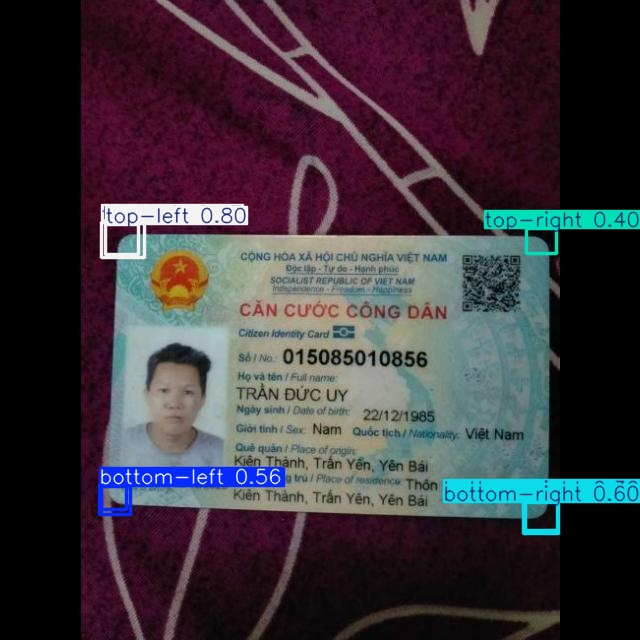

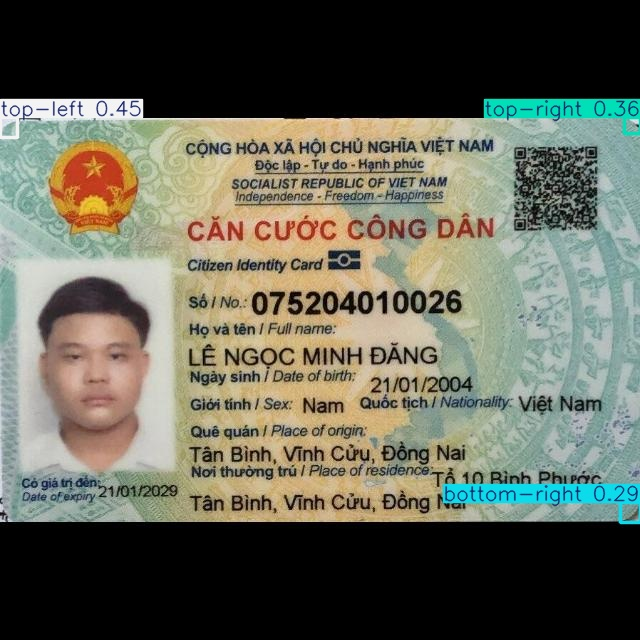

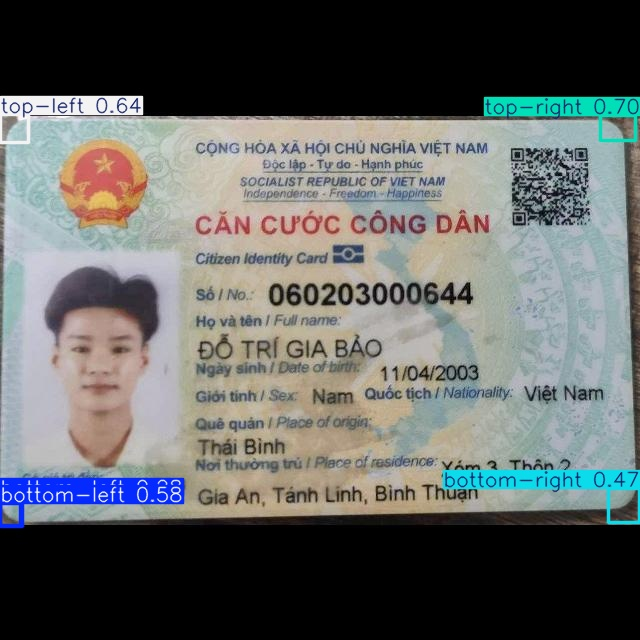

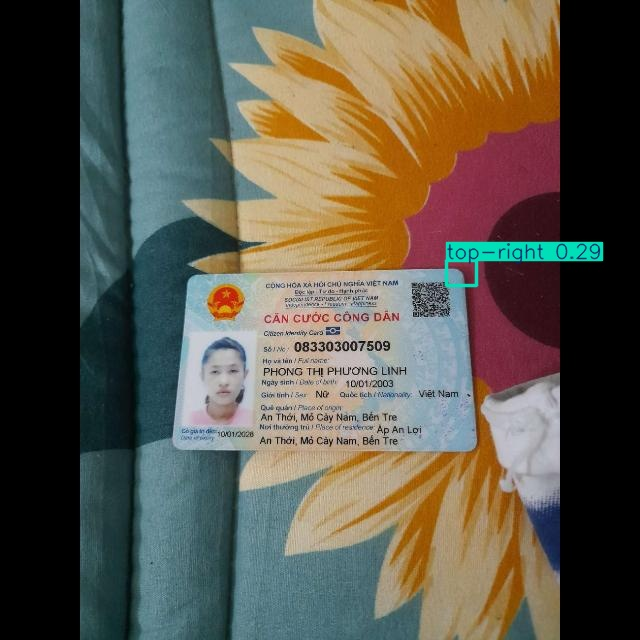

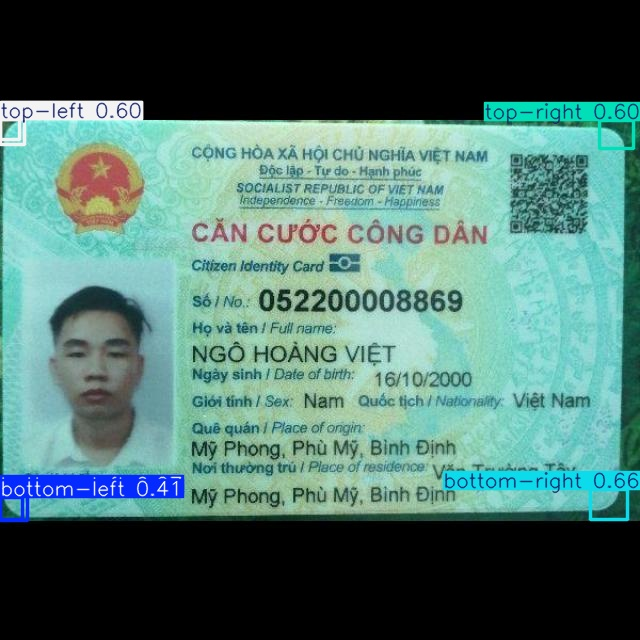

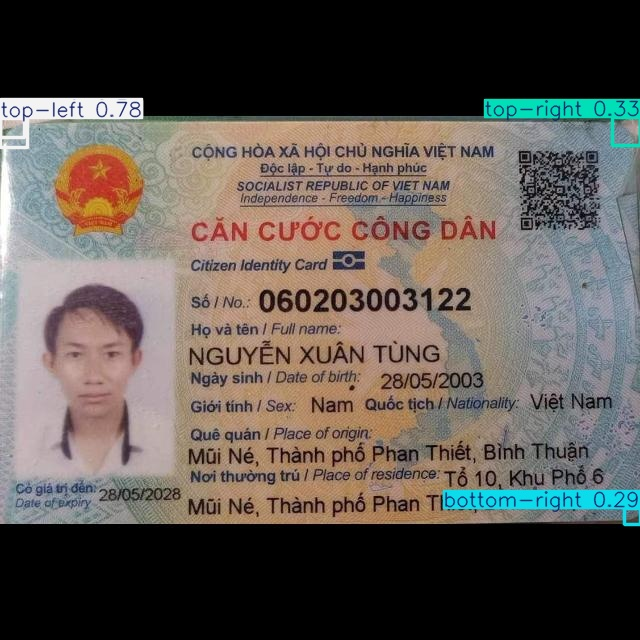

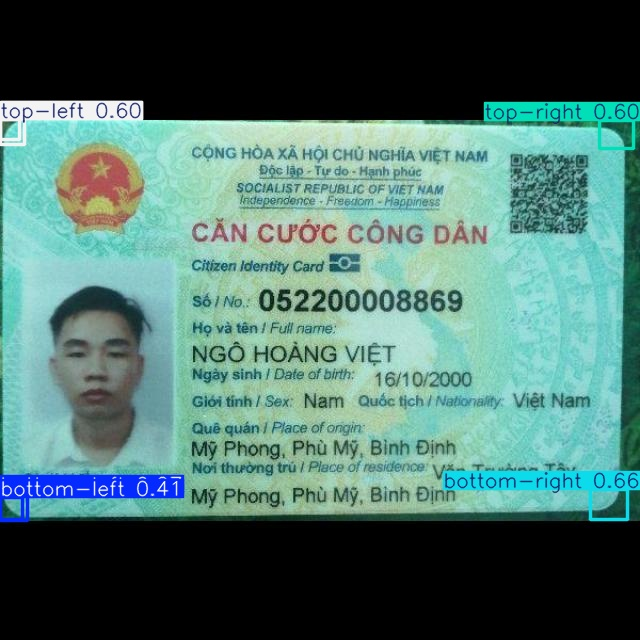

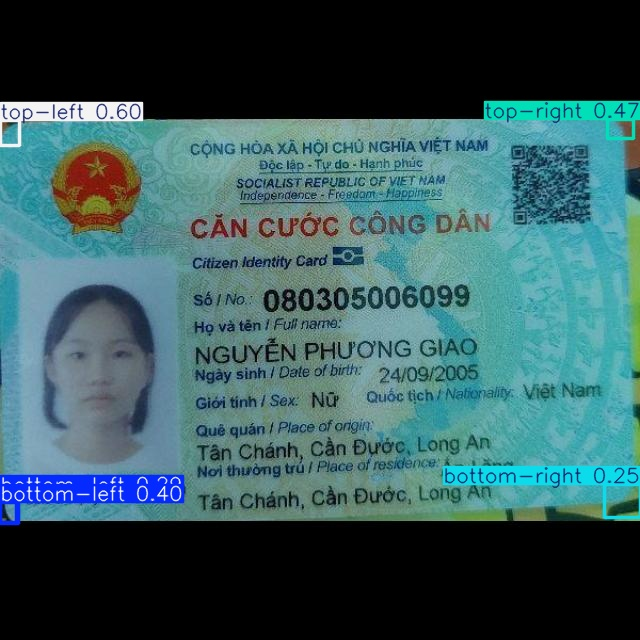

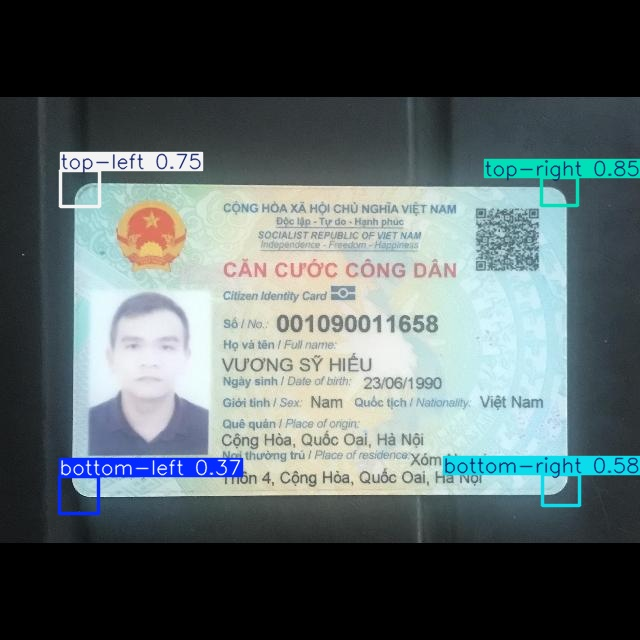

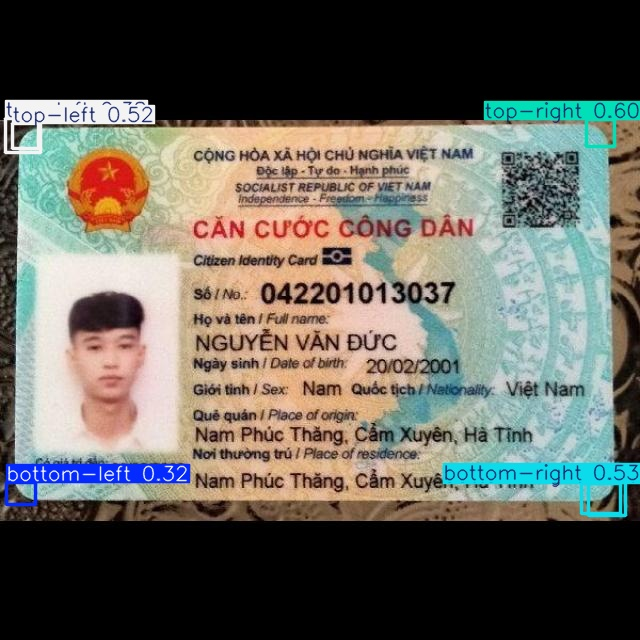

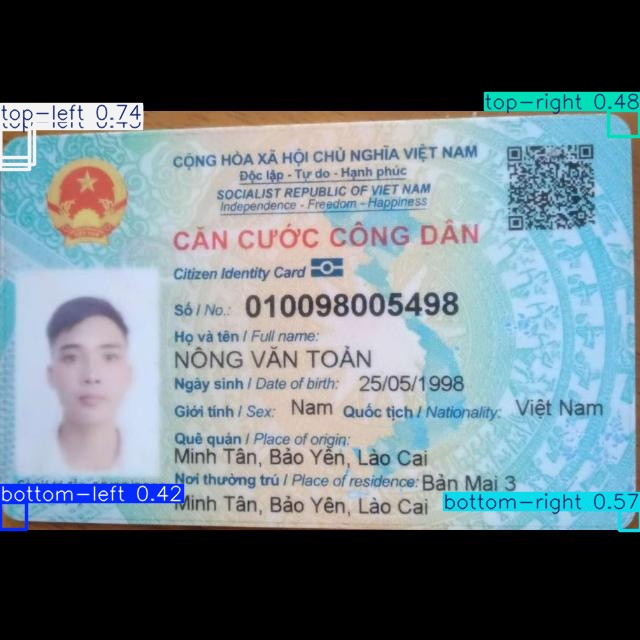

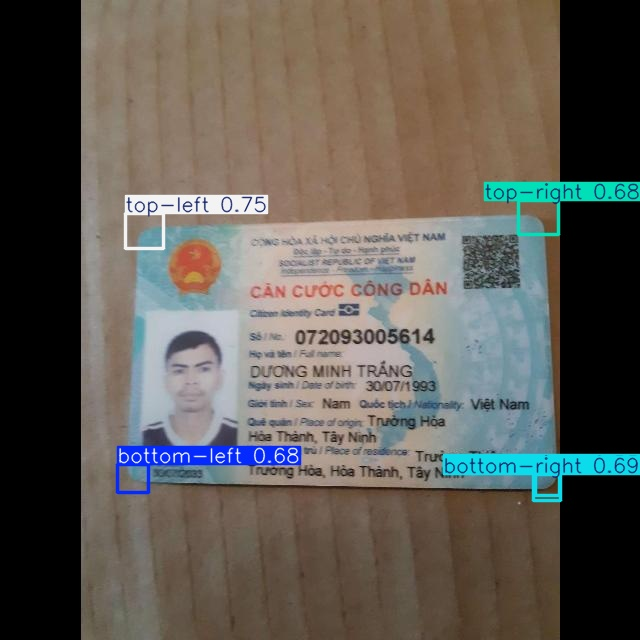

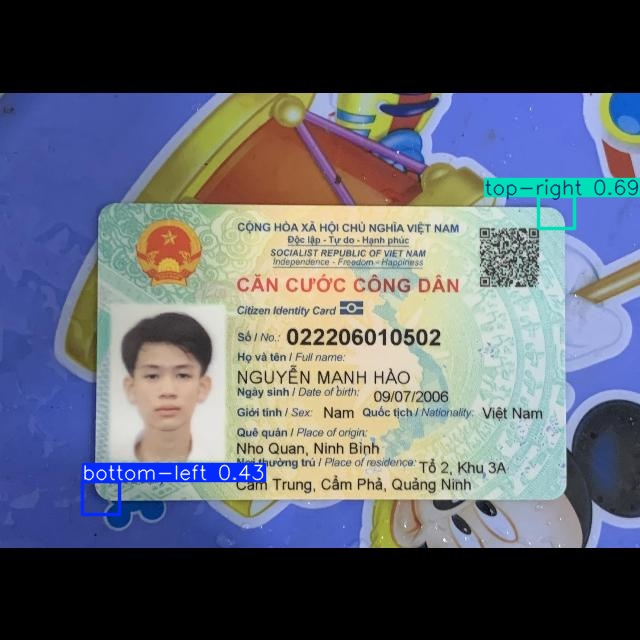

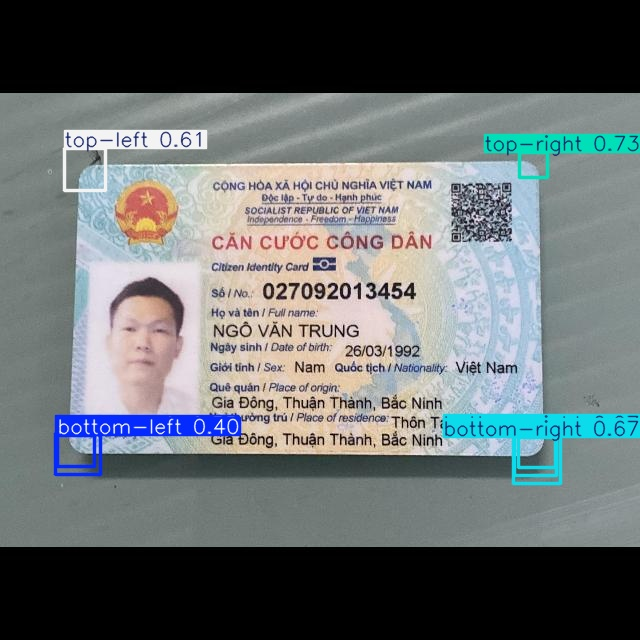

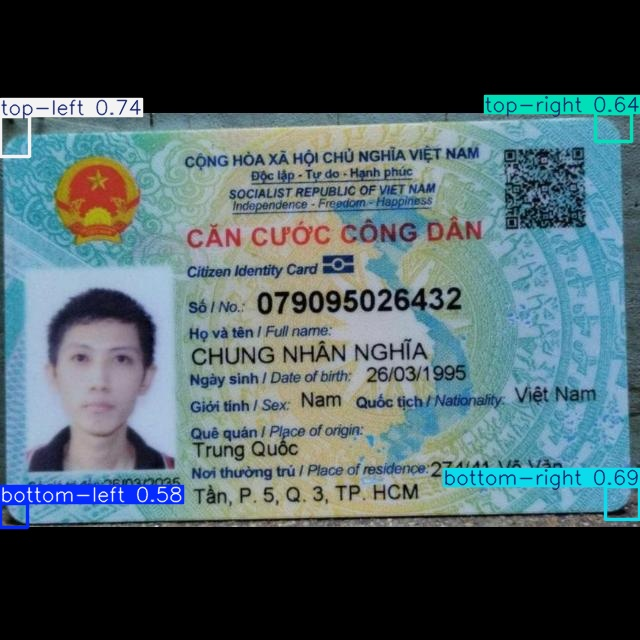

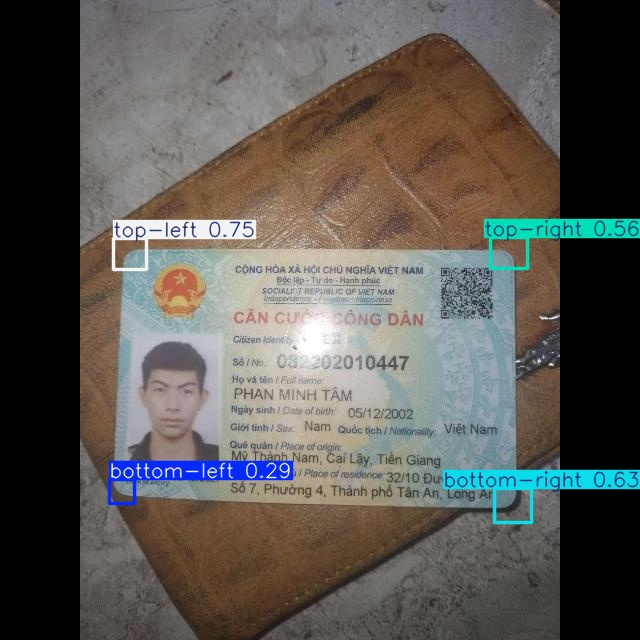

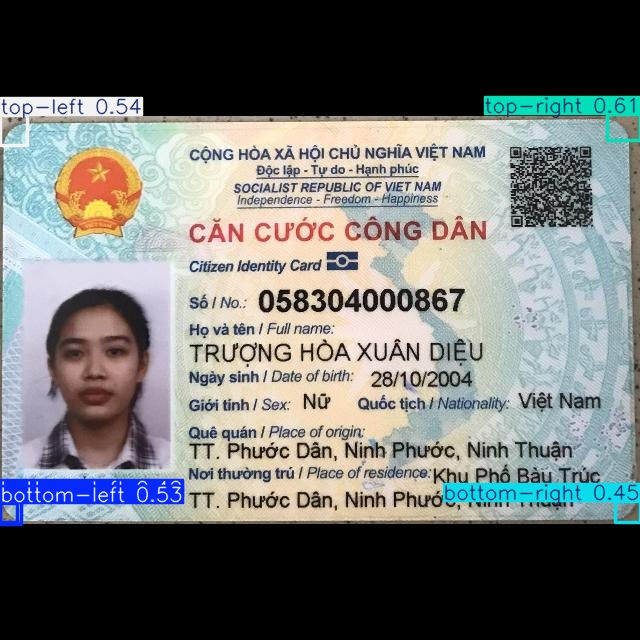

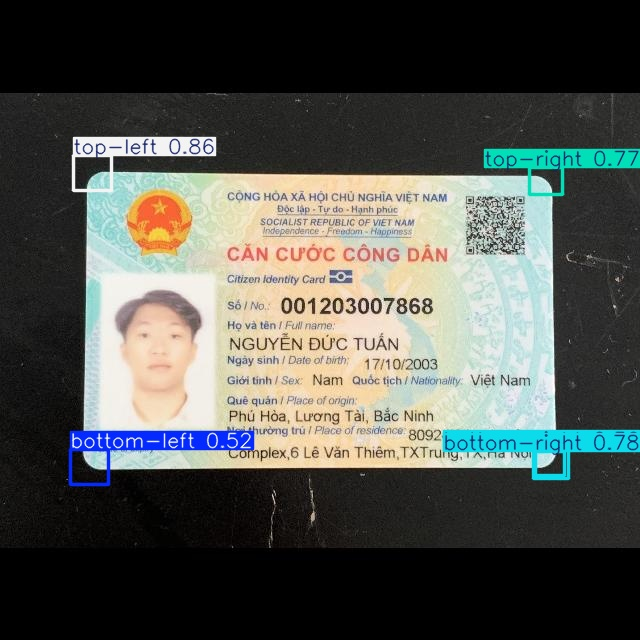

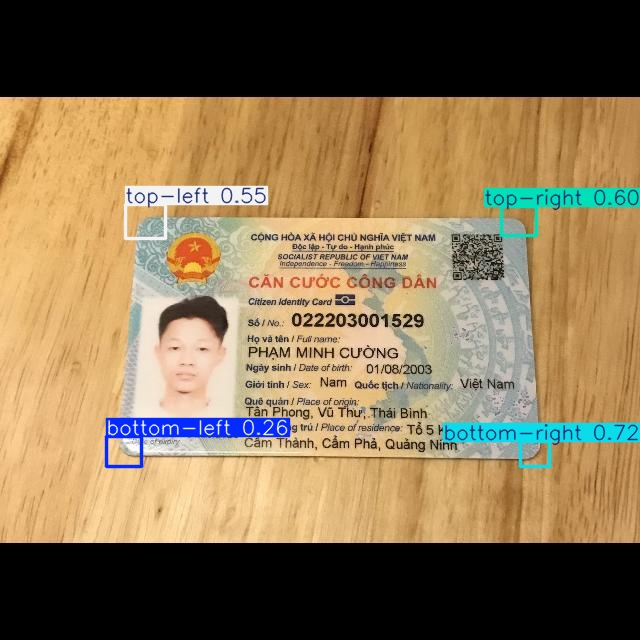

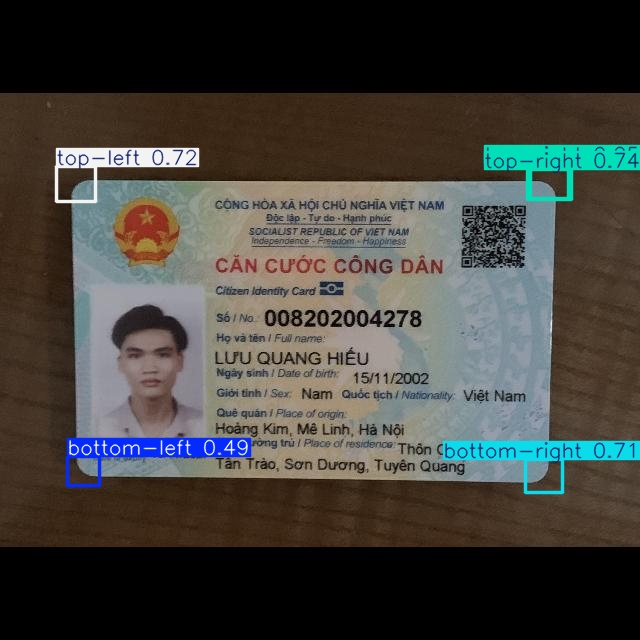

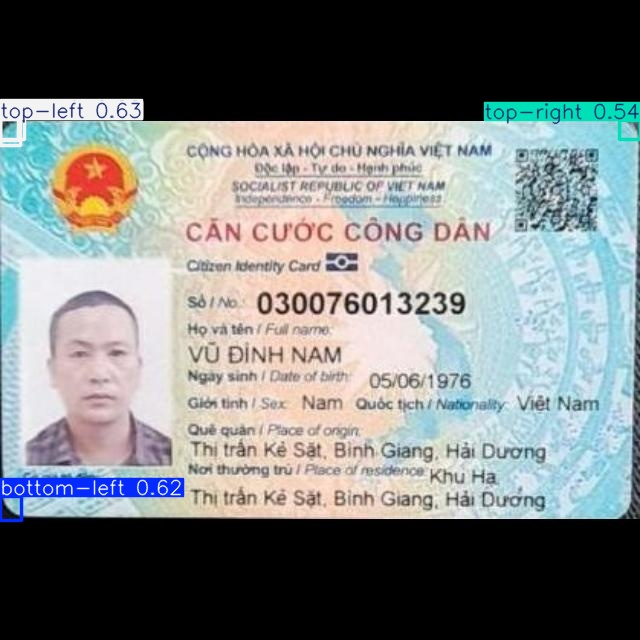

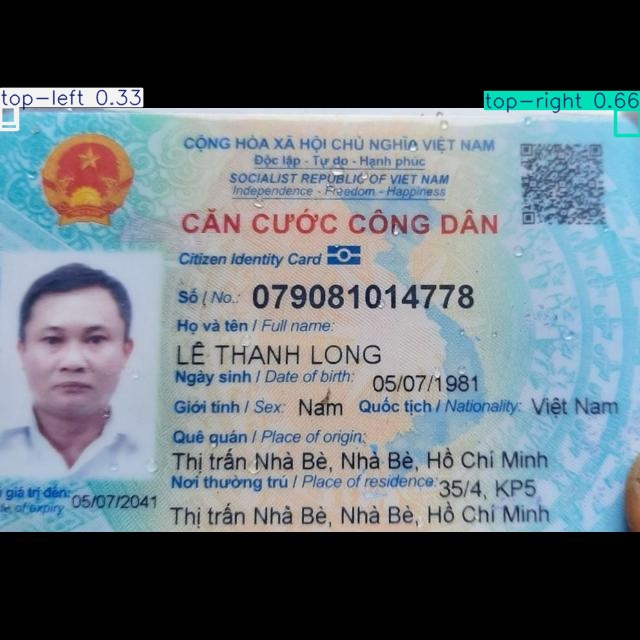

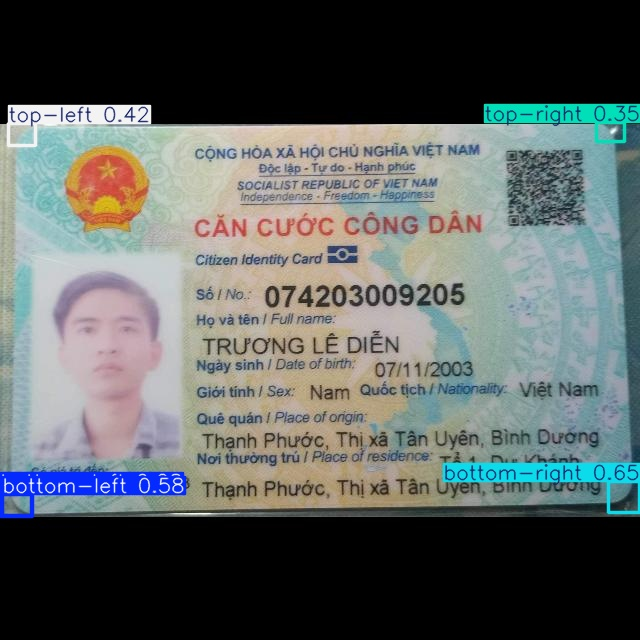

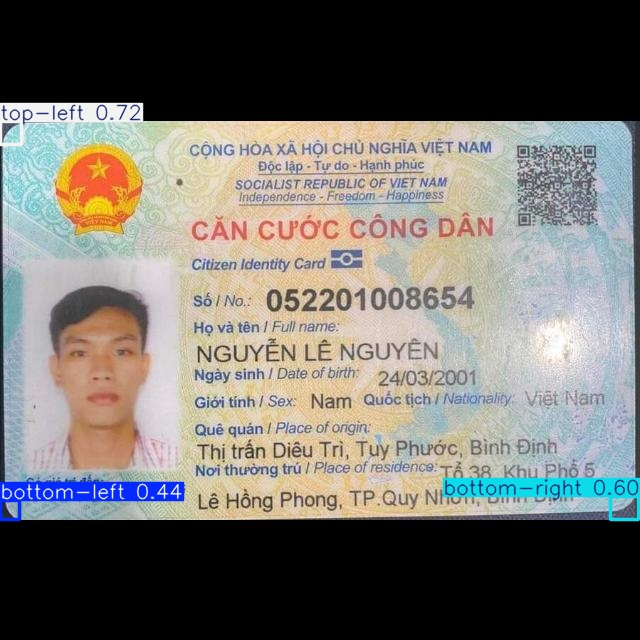

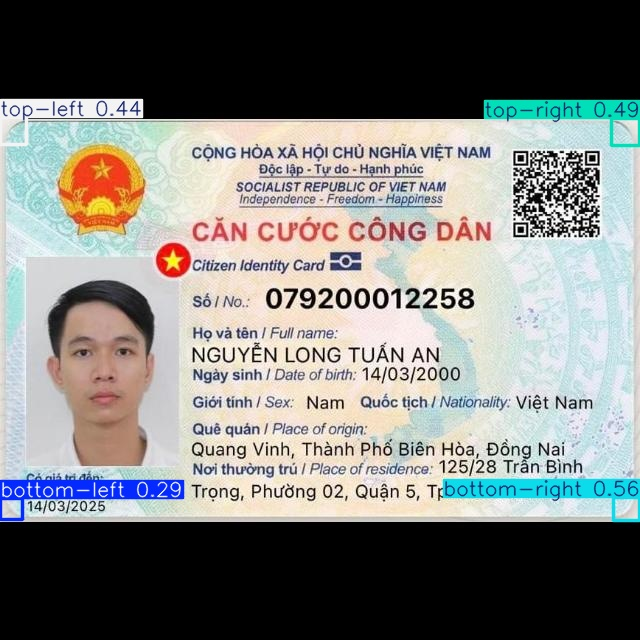

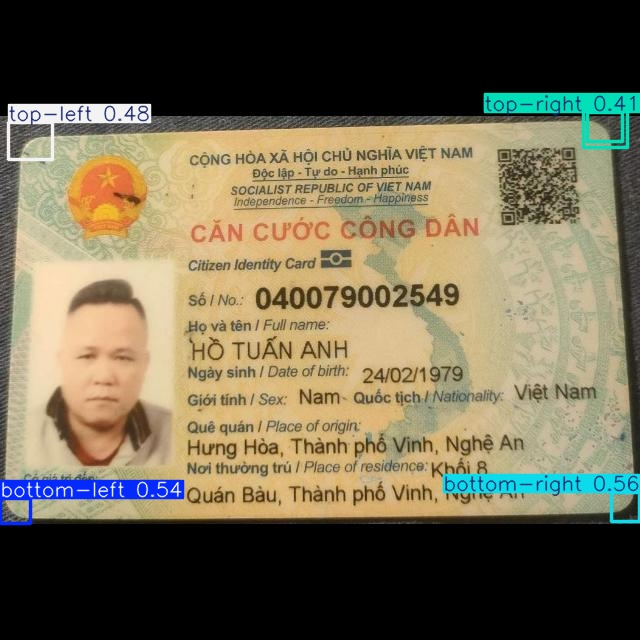

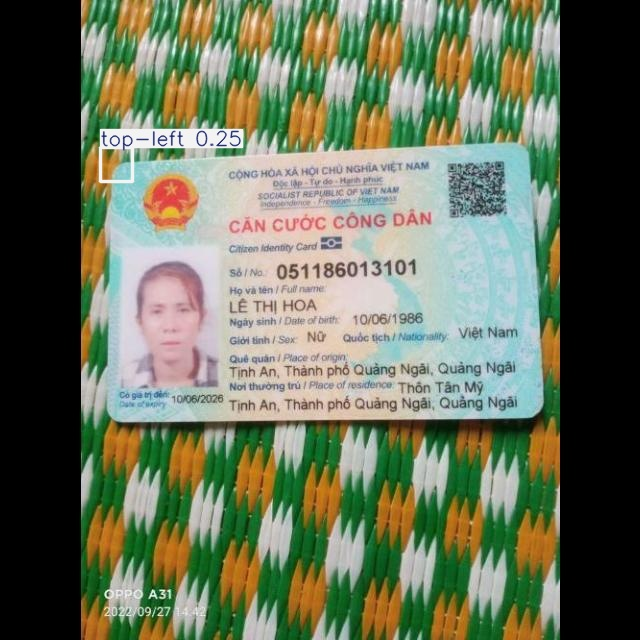

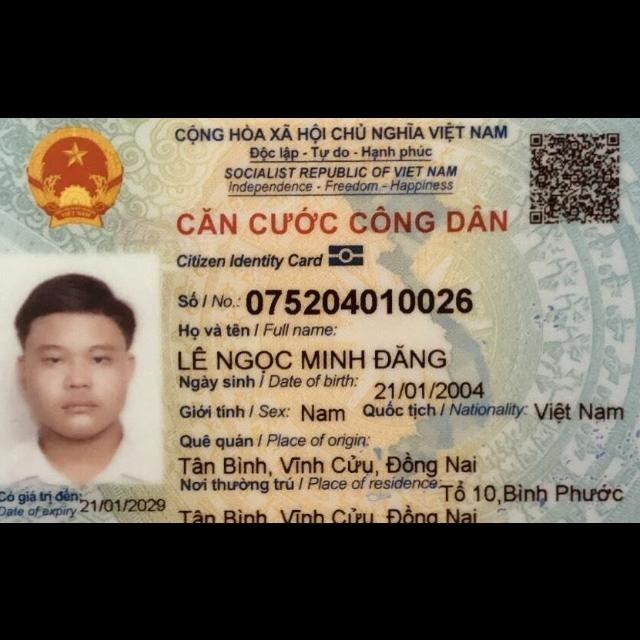

In [ ]:
import glob
from IPython.display import display, Image
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
    display(Image(filename=image_path))
    print('\n')